In [1]:
library(reticulate)
library(bigrquery)
library(ggplot2)
library(tidyverse)
library(ggpubr)
library(vcfR)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


   *****       ***   vcfR   ***       *****
   This is vcfR 1.13.0 
     browseVignettes('vcfR') # Documentation
     citation('vcfR') # Citation
   *****       *****      *****       *****




In [2]:
fapi = import('firecloud.api')

In [3]:
BILLING_PROJECT_ID = Sys.getenv('GOOGLE_PROJECT')       # terra-7a376e4e
WORKSPACE_BUCKET = Sys.getenv('WORKSPACE_BUCKET')       # gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34
WORKSPACE_NAME = Sys.getenv('WORKSPACE_NAME')           # AoU_DRC_WGS_LongReads_PacBio
WORKSPACE_NAMESPACE = Sys.getenv('WORKSPACE_NAMESPACE') # allofus-drc-wgs-lr-prod

In [4]:
load_workspace_table <- function(table_name) {
    a = fapi$get_entities(WORKSPACE_NAMESPACE, WORKSPACE_NAME, table_name)

    json = a$json()
    df = tibble(metadata = json) %>% unnest_wider(metadata) %>% unnest_wider(attributes)

    for (name in df %>% select(where(is.list)) %>% names()) {
        q = as.vector(unlist(df[,name])) %in% c("true", "TRUE", "false", "FALSE") %>% unique()
        if (q) {
            df[,name] = as.logical(as.vector(unlist(df[,name])))
        }
    }
    
    return(df)
}

In [5]:
ha_sample_asm_analysis_df = load_workspace_table('ha-sample-asm-analysis')

In [6]:
ha_sample_asm_analysis_df

hifiasm_hap2,hap2_gc_pct,hap2_n75,hap1_gc_pct,hap1_total_aligned_length,hap2_l75,mosdepth_cov,hap1_unaligned_length,hap1_l75,hap2_num_contigs,⋯,hap1_n50,hap1_num_mismatches_per_100_kbp,hap1_quast_report_txt,hap1_total_length,hap2_quast_report_html,hap1_l50,hap1_quast_report_html,hap1_genome_fraction_pct,entityType,name
<chr>,<dbl>,<int>,<dbl>,<chr>,<int>,<chr>,<int>,<int>,<int>,⋯,<int>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<chr>,<chr>
gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/ref_free/PBAssembleWithHifiasm/1000513/assembly/1000513.haploTigs/1000513.bp.hap2.p_ctg.fa.gz,40.96,60557,40.94,2388074338,14391,6.98,11537677,15579,27913,⋯,96345,205.37,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/ref_free/EvaluateAssembly/1000513/assembly_metrics/report.txt,2405675751,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/ref_free/EvaluateAssembly/1000513/assembly_metrics/report.html,7422,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/ref_free/EvaluateAssembly/1000513/assembly_metrics/report.html,72.713,ha-sample-asm-analysis,1000513
gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/ref_free/PBAssembleWithHifiasm/1000920/assembly/1000920.haploTigs/1000920.bp.hap2.p_ctg.fa.gz,40.69,82706,40.70,3150782127,13798,7.92,13789574,15399,26855,⋯,128468,233.75,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/ref_free/EvaluateAssembly/1000920/assembly_metrics/report.txt,3171696495,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/ref_free/EvaluateAssembly/1000920/assembly_metrics/report.html,7351,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/ref_free/EvaluateAssembly/1000920/assembly_metrics/report.html,80.555,ha-sample-asm-analysis,1000920
gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/ref_free/PBAssembleWithHifiasm/1002322/assembly/1002322.haploTigs/1002322.bp.hap2.p_ctg.fa.gz,40.79,88781,40.78,2797384272,11008,8.6,10241012,11395,22877,⋯,154206,200.54,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/ref_free/EvaluateAssembly/1002322/assembly_metrics/report.txt,2814782825,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/ref_free/EvaluateAssembly/1002322/assembly_metrics/report.html,5252,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/ref_free/EvaluateAssembly/1002322/assembly_metrics/report.html,81.328,ha-sample-asm-analysis,1002322
gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/ref_free/PBAssembleWithHifiasm/1002826/assembly/1002826.haploTigs/1002826.bp.hap2.p_ctg.fa.gz,40.68,80750,40.68,3324603775,14602,8.14,15807175,15861,29010,⋯,132194,243.73,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/ref_free/EvaluateAssembly/1002826/assembly_metrics/report.txt,3349113505,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/ref_free/EvaluateAssembly/1002826/assembly_metrics/report.html,7406,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/ref_free/EvaluateAssembly/1002826/assembly_metrics/report.html,82.555,ha-sample-asm-analysis,1002826
gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/ref_free/PBAssembleWithHifiasm/1004266/assembly/1004266.haploTigs/1004266.bp.hap2.p_ctg.fa.gz,40.86,76931,40.87,2913043294,13877,7.42,13684968,15728,26390,⋯,115991,241.70,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/ref_free/EvaluateAssembly/1004266/assembly_metrics/report.txt,2934613021,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/ref_free/EvaluateAssembly/1004266/assembly_metrics/report.html,7526,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/ref_free/EvaluateAssembly/1004266/assembly_metrics/report.html,77.327,ha-sample-asm-analysis,1004266
gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/ref_free/PBAssembleWithHifiasm/1005038/assembly/1005038.haploTigs/1005038.bp.hap2.p_ctg.fa.gz,40.88,72677,40.88,2986464528,14954,7.58,14979868,16793,28892,⋯,111710,236.90,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/ref

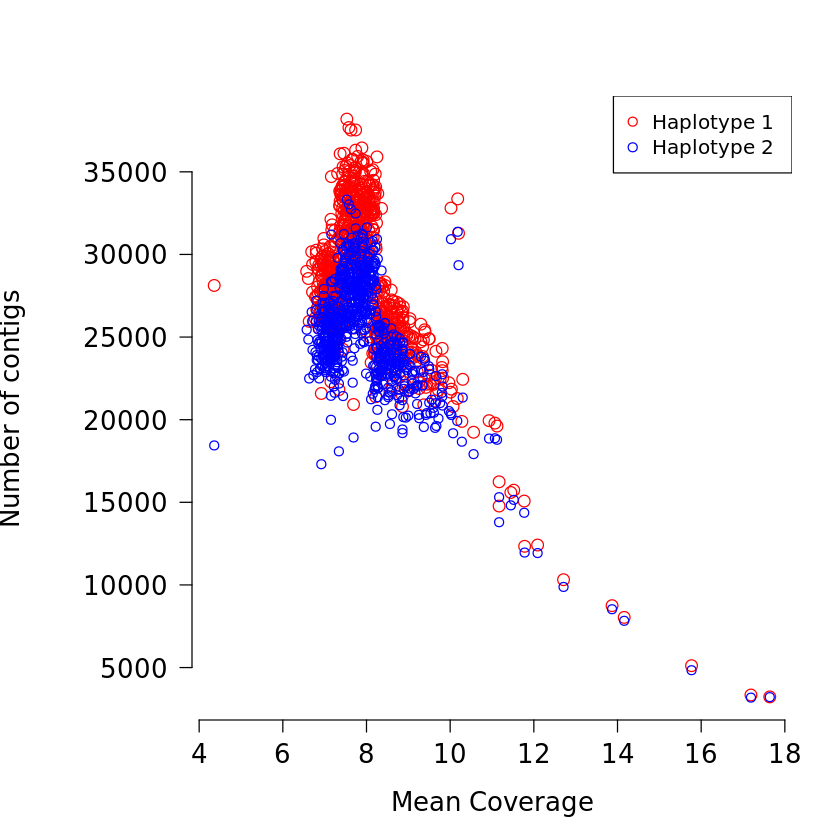

In [7]:
par(mar=c(5, 8, 4, 2))

plot(ha_sample_asm_analysis_df$mosdepth_cov, ha_sample_asm_analysis_df$hap1_num_contigs,
    bty="n",
    las=1,
    xlab="Mean Coverage",
    ylab="",
    cex=1.3,
    cex.axis=1.3,
    cex.lab=1.3,
    pch=21,
    col="#ff0000",
)

points(ha_sample_asm_analysis_df$mosdepth_cov, ha_sample_asm_analysis_df$hap2_num_contigs,
    pch=21,
    col="#0000ff"
)

mtext("Number of contigs", 2, line = 7, cex=1.3)

legend("topright", c("Haplotype 1", "Haplotype 2"), pch=21, col=c("#ff0000", "#0000ff"))

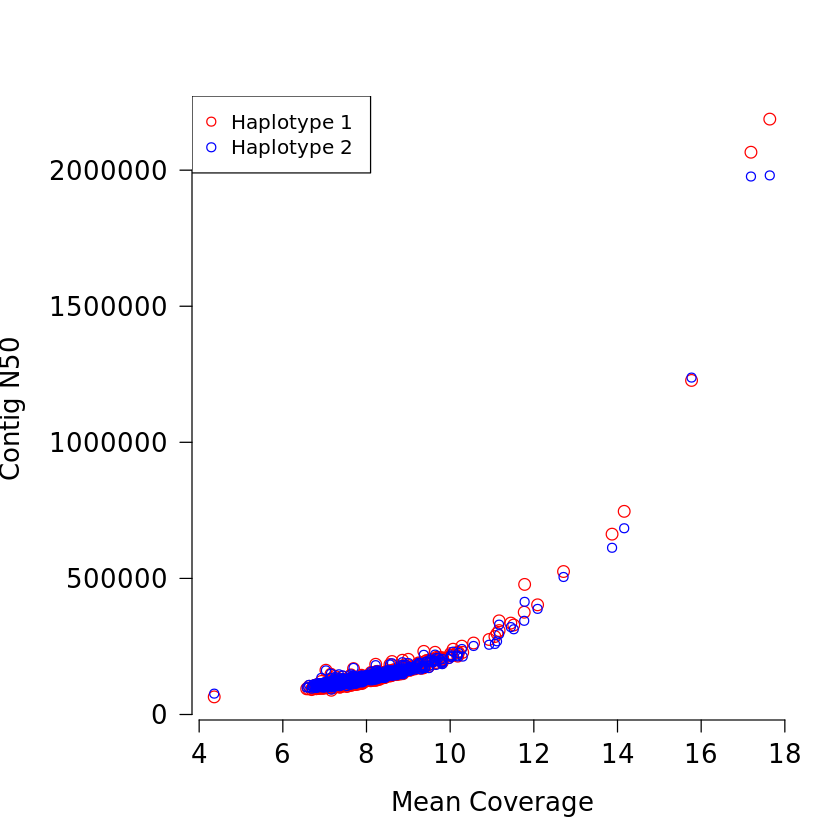

In [8]:
par(mar=c(5, 8, 4, 2))

plot(ha_sample_asm_analysis_df$mosdepth_cov, ha_sample_asm_analysis_df$hap1_n50,
    bty="n",
    las=1,
    xlab="Mean Coverage",
    ylab="",
    cex=1.3,
    cex.axis=1.3,
    cex.lab=1.3,
    pch=21,
    col="#ff0000",
)

points(ha_sample_asm_analysis_df$mosdepth_cov, ha_sample_asm_analysis_df$hap2_n50,
    pch=21,
    col="#0000ff"
)

mtext("Contig N50", 2, line = 7, cex=1.3)

legend("topleft", c("Haplotype 1", "Haplotype 2"), pch=21, col=c("#ff0000", "#0000ff"))

In [14]:
ha_sample_asm_analysis_df$hap2_n50 %>% na.omit() %>% mean()

[1] 143644.2

Warning message:
“Unknown or uninitialised column: `hap2_duplication_ratio`.”


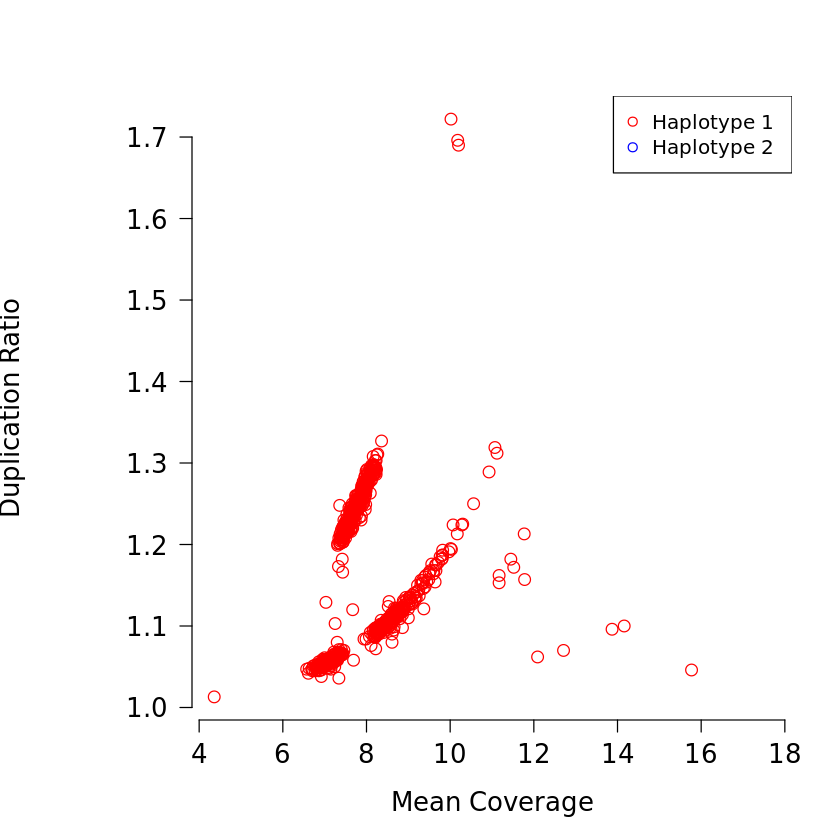

In [9]:
par(mar=c(5, 8, 4, 2))

plot(ha_sample_asm_analysis_df$mosdepth_cov, ha_sample_asm_analysis_df$hap1_duplication_ratio,
    bty="n",
    las=1,
    xlab="Mean Coverage",
    ylab="",
    cex=1.3,
    cex.axis=1.3,
    cex.lab=1.3,
    pch=21,
    col="#ff0000",
)

points(ha_sample_asm_analysis_df$mosdepth_cov, ha_sample_asm_analysis_df$hap2_duplication_ratio,
    pch=21,
    col="#0000ff"
)

mtext("Duplication Ratio", 2, line = 7, cex=1.3)

legend("topright", c("Haplotype 1", "Haplotype 2"), pch=21, col=c("#ff0000", "#0000ff"))

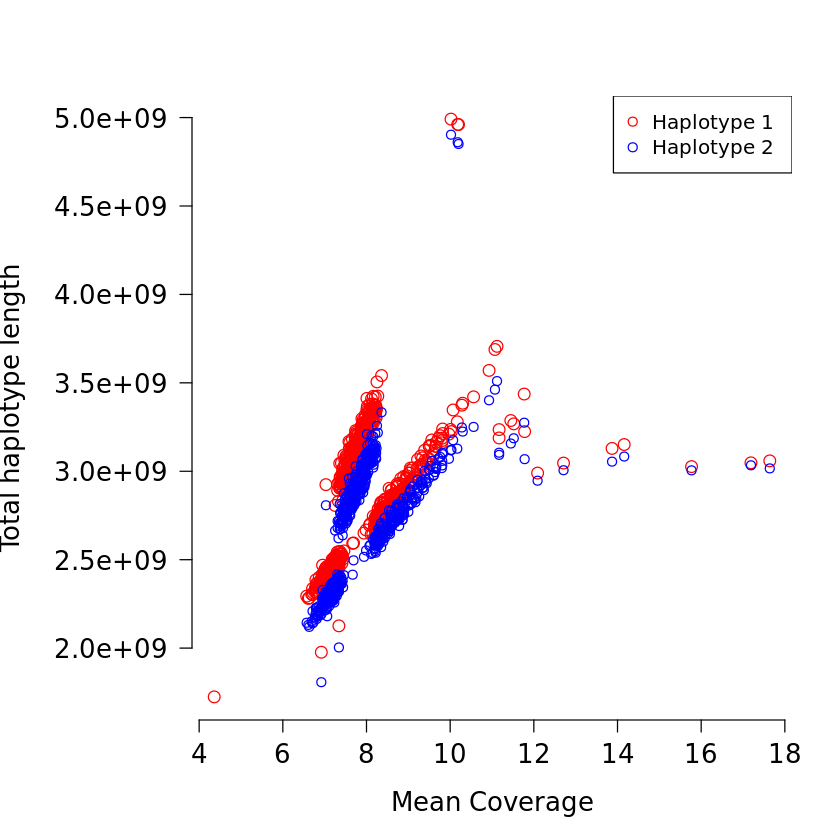

In [10]:
par(mar=c(5, 8, 4, 2))

plot(ha_sample_asm_analysis_df$mosdepth_cov, ha_sample_asm_analysis_df$hap1_total_length,
    bty="n",
    las=1,
    xlab="Mean Coverage",
    ylab="",
    cex=1.3,
    cex.axis=1.3,
    cex.lab=1.3,
    pch=21,
    col="#ff0000",
)

points(ha_sample_asm_analysis_df$mosdepth_cov, ha_sample_asm_analysis_df$hap2_total_length,
    pch=21,
    col="#0000ff"
)

mtext("Total haplotype length", 2, line = 7, cex=1.3)

legend("topright", c("Haplotype 1", "Haplotype 2"), pch=21, col=c("#ff0000", "#0000ff"))